In [237]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta 
import matplotlib.pyplot as plt


In [238]:
df = yf.download('SQ', start = '2019-01-01')


[*********************100%%**********************]  1 of 1 completed


In [239]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800
...,...,...,...,...,...,...
2024-10-14,69.959999,71.760002,69.000000,71.650002,71.650002,6955700
2024-10-15,72.250000,72.550003,69.859001,71.790001,71.790001,5465700
2024-10-16,71.889999,73.589996,71.323997,73.529999,73.529999,5292100


In [240]:
# take the mean over a specified 20 day window
df['ma_20'] = df.Close.rolling(20).mean()
# the rolling standard deviation we are working with in here
df['vol'] = df.Close.rolling(20).std()
# the bollinger band upper part
df['upper_bb'] = df.ma_20 + (2 * df.vol)
df['lower_bb'] = df.ma_20 - (2* df.vol)

In [241]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-14,69.959999,71.760002,69.000000,71.650002,71.650002,6955700,67.432999,1.674324,70.781646,64.084352
2024-10-15,72.250000,72.550003,69.859001,71.790001,71.790001,5465700,67.655999,1.936384,71.528768,63.783230
2024-10-16,71.889999,73.589996,71.323997,73.529999,73.529999,5292100,67.995499,2.323809,72.643118,63.347880


<Axes: xlabel='Date'>

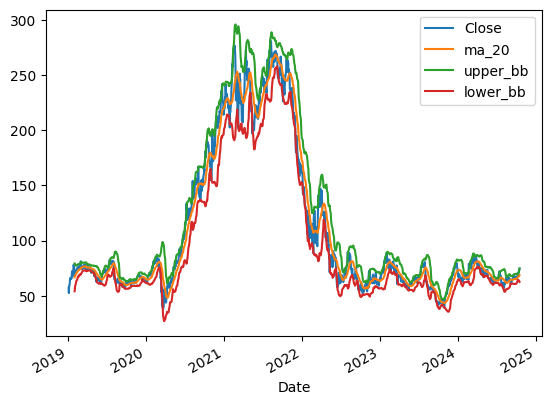

In [242]:
#graph of the print out
df[['Close','ma_20','upper_bb','lower_bb']].plot()

In [243]:
import ta.momentum


df['rsi'] = ta.momentum.rsi(df.Close, window=6)


In [244]:
# conditon calls we want to make if we want to buy a stocka and calls if we dont
conditions = [(df.rsi < 30)& (df.Close < df.lower_bb),
              (df.rsi > 70) & (df.Close > df.upper_bb)] 


In [245]:
choices = ['Buy', 'Sell']
df['signal'] = np.select(conditions, choices)

In [246]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN,NaN,0
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN,NaN,0
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN,NaN,0
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN,NaN,0
2019-01-08,62.599998,63.799999,61.150002,63.119999,63.119999,21511800,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-14,69.959999,71.760002,69.000000,71.650002,71.650002,6955700,67.432999,1.674324,70.781646,64.084352,77.495040,Sell
2024-10-15,72.250000,72.550003,69.859001,71.790001,71.790001,5465700,67.655999,1.936384,71.528768,63.783230,78.013015,Sell
2024-10-16,71.889999,73.589996,71.323997,73.529999,73.529999,5292100,67.995499,2.323809,72.643118,63.347880,83.631732,Sell


In [247]:
# clean up the veiw of the data and look at recent calculations
df.dropna(inplace=True)
# show the last fifty values that have appeared
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2024-08-09,61.779999,62.680000,60.700001,62.139999,62.139999,5941000,63.477000,4.972530,73.422061,53.531939,59.470755,0
2024-08-12,62.160000,62.310001,60.360001,61.090000,61.090000,5746200,62.928500,4.564209,72.056917,53.800083,51.989789,0
2024-08-13,61.880001,63.650002,61.369999,63.369999,63.369999,4887500,62.493500,4.030485,70.554470,54.432530,63.841715,0
2024-08-14,63.459999,63.599998,61.810001,62.200001,62.200001,5065500,62.011000,3.375900,68.762801,55.259199,55.417422,0
2024-08-15,63.580002,64.730003,63.490002,64.250000,64.250000,6944500,61.823500,3.120216,68.063932,55.583068,65.100228,0
2024-08-16,64.470001,65.930000,64.470001,65.870003,65.870003,5486500,61.712000,2.917374,67.546748,55.877253,71.060549,0
2024-08-19,66.000000,66.900002,65.730003,66.879997,66.879997,4454500,61.643500,2.768044,67.179587,56.107413,74.339244,0
2024-08-20,66.809998,67.266998,64.830002,64.879997,64.879997,4906900,61.543000,2.598850,66.740700,56.345300,58.570935,0
2024-08-21,64.925003,65.699997,64.089996,65.650002,65.650002,5672200,61.740000,2.756712,67.253425,56.226576,62.268497,0


In [248]:
# setting up the flags and markers for when we buy and sell the values 
# we need to shift the signal by one row to look at the buy prices due to buying on the next day
df['signal'] = df['signal'].shift(1)

In [249]:
position = False
buydates, selldates = [], []
buyprices, sellprices = [], []

# Use enumerate to get both index and row
for index in range(len(df)):
    row = df.iloc[index]  # Access the row by integer index
    
    # Buy condition
    if not position and row['signal'] == 'Buy':
        buydates.append(df.index[index])
        buyprices.append(row['Open'])
        position = True

    # Sell condition
    if position:
        # Access the previous close price safely
        previous_close = df['Close'].iloc[index - 1] if index > 0 else None
        if row['signal'] == 'Sell' or previous_close < 0.70 * buyprices[-1]:
            selldates.append(df.index[index])
            sellprices.append(row['Open'])
            position = False

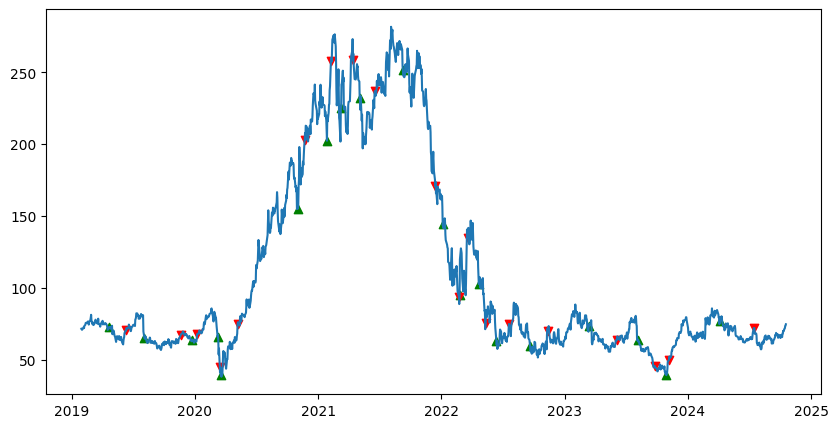

In [250]:
#visualization of the strategy
plt.figure(figsize =(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker = '^', c = 'g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker = 'v', c = 'r')

In [251]:
# calculate the return per investment
# jus us the part up to the +1 until we get the result
(pd.Series([(sell - buy) / buy for sell, buy in zip(sellprices, buyprices)]) + 1).prod()-1
# this strategy can be imporveed by adjusting the loses to make it work better, shift the close column by one row to get the better and more optimal result

0.09412832115452496

In [252]:
pd.Series([(sell - buy) / buy for sell, buy in zip(sellprices, buyprices)])

0    -0.006852
1     0.002417
2     0.086306
3    -0.348460
4     0.702657
5     0.316456
6     0.257683
7     0.272833
8    -0.010400
9    -0.334766
10   -0.318945
11    0.665383
12   -0.363704
13    0.108071
14    0.144883
15   -0.111127
16   -0.304551
17    0.218479
18   -0.046776
dtype: float64

In [253]:
df['shifted_Close'] = df.Close.shift()